In [2]:
%matplotlib inline
import os
import os.path as op
import glob
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision as tv
from torchvision import transforms, models

In [2]:
def save_mnist_to_jpg(img_fname, lb_fname, save_dir):
    import os
    import os.path as op
    import numpy as np
    import cv2
    
    if 'train' in op.basename(img_fname):
        num_file = 60000
        prefix = 'train'
    else:
        num_file = 10000
        prefix = 'test'
        
    with open(img_fname, 'rb') as f1:
        image_file = f1.read()
    with open(lb_fname, 'rb') as f2:
        label_file = f2.read()
        
    image_file = image_file[16:]
    label_file = label_file[8:]
    if len(os.listdir(save_dir)) == prefix:
        for i in range(num_file):
            label = int(label_file[i])
            image_list = [int(item) for item in image_file[i*784: i*784+784]]
            image_np = np.array(image_list, dtype=np.uint8).reshape(28, 28, 1)
            save_name = op.join(save_dir, f'{prefix}_{i}_{label}.jpg')
            cv2.imwrite(save_name, image_np)
            print(f'{prefix}_{i}_{label}.jpg')
    else:
        print('Images existed!')

In [3]:
img_fname = 'H:\DeepLearning\MNIST\\t10k-images.idx3-ubyte'
lb_fname = 'H:\DeepLearning\MNIST\\t10k-labels.idx1-ubyte'
save_dir = 'H:\DeepLearning\MNIST\\test_images'
# save_mnist_to_jpg(img_fname, lb_fname, save_dir)

In [5]:
# create annot file(.txt) for all the images
train_img_dir = 'MNIST/train_images'
imgs = glob.glob(op.join(train_img_dir, '*.jpg'))

labels = []
for img_name in imgs:
    labels.append(img_name[img_name.rfind('_')+1: -4])
    
img_labels_df = pd.DataFrame(dict(zip(imgs, labels)).items())
img_labels_df.to_csv('all.txt', sep='\t', index=None, header=None)

In [6]:
# create annot file(.txt) for all the images
test_img_dir = 'MNIST/test_images'
test_imgs = glob.glob(op.join(test_img_dir, '*.jpg'))

test_labels = []
for img_name in test_imgs:
    test_labels.append(img_name[img_name.rfind('_')+1: -4])
    
test_img_labels_df = pd.DataFrame(dict(zip(test_imgs, test_labels)).items())
test_img_labels_df.to_csv('test.txt', sep='\t', index=None, header=None)

In [8]:
index_range = list(range(len(imgs)))
random.shuffle(index_range)

train_num = int(len(imgs) * 0.8)
train_num

48000

In [27]:
shuffled_train_imgs = list(np.array(imgs)[index_range[: train_num]])
shuffled_train_labels = list(np.array(labels)[index_range[: train_num]])

shuffled_valid_imgs = list(np.array(imgs)[index_range[train_num: ]])
shuffled_valid_labels = list(np.array(labels)[index_range[train_num: ]])

shuffled_train_df = pd.DataFrame(dict(zip(shuffled_train_imgs, shuffled_train_labels)).items())
shuffled_valid_df = pd.DataFrame(dict(zip(shuffled_valid_imgs, shuffled_valid_labels)).items())

shuffled_train_df.to_csv('train.txt', sep='\t', index=None, header=None)
shuffled_valid_df.to_csv('valid.txt', sep='\t', index=None, header=None)

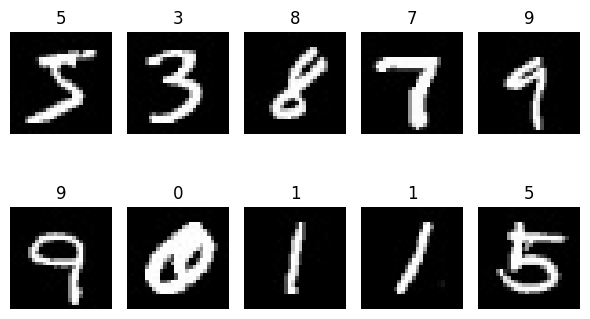

In [7]:
import cv2

fig, axes = plt.subplots(2, 5, dpi=100)
for i in range(10):
    img = cv2.imread(imgs[i])
    axes[i//5, i-5].imshow(img)
    axes[i//5, i-5].axis('off')
    axes[i//5, i-5].set_title(img_labels_df.iloc[i, 1])
fig.tight_layout()

In [24]:
shuffled_valid_labels = np.array(shuffled_valid_labels)
all_len = []
for i in range(10):
    all_len.append(len(shuffled_valid_labels[shuffled_valid_labels==str(i)]))

In [25]:
all_len

[1144, 1335, 1214, 1236, 1196, 1100, 1132, 1241, 1183, 1219]